# Preparación de datos

## Integrates
### Marcos Pool & Oscar Manuel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# %pip install xlrd

# Introducción

En este documento exploraremos un ejemplo de segmentación de clientes de una compañía telefónica a partir de variables relacionadas con el uso/consumo de servicios .



In [3]:
dat = pd.read_excel("../files/TELCOS SEGMENTATION MODELING DATA.xls")

dat.head()

,CUST_ID,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
0,C10001,9.959105,9.543413,0.755283,25.070877,3.224588,26.999948,23.938515,85.208720,0.952386,...,0.702530,0.297470,0.724905,0.275095,0.958260,0.075838,0.928553,0.119429,0.697638,1.019744
1,C10002,62.621553,61.004625,13.382496,55.258668,14.570813,58.832688,339.326176,400.972355,261.548570,...,0.766309,0.233691,0.817772,0.182228,0.974179,0.213704,0.939251,0.247665,1.957842,2.277142
2,C10003,37.708142,38.431589,3.457559,32.674331,5.602626,33.909000,201.631700,275.943749,6.485728,...,0.739523,0.260477,0.803432,0.196568,1.019185,0.091693,0.963589,0.165225,0.980638,0.736401
3,C10004,11.657388,5.812149,4.521838,26.685568,7.822684,32.037527,13.380224,80.397415,10.300143,...,0.676602,0.323398,0.845814,0.154186,0.498581,0.387895,0.832947,0.244173,0.356061,0.320284
4,C10005,22.688819,16.822096,2.902318,37.656375,3.455395,40.061273,22.682055,60.782144,2.323378,...,0.772988,0.227012,0.475572,0.524428,0.741427,0.127918,0.939970,0.086253,0.801681,0.418284


In [4]:
dat.index = dat["CUST_ID"]

dat.head()

,CUST_ID,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,C10001,9.959105,9.543413,0.755283,25.070877,3.224588,26.999948,23.938515,85.208720,0.952386,...,0.702530,0.297470,0.724905,0.275095,0.958260,0.075838,0.928553,0.119429,0.697638,1.019744
C10002,C10002,62.621553,61.004625,13.382496,55.258668,14.570813,58.832688,339.326176,400.972355,261.548570,...,0.766309,0.233691,0.817772,0.182228,0.974179,0.213704,0.939251,0.247665,1.957842,2.277142
C10003,C10003,37.708142,38.431589,3.457559,32.674331,5.602626,33.909000,201.631700,275.943749,6.485728,...,0.739523,0.260477,0.803432,0.196568,1.019185,0.091693,0.963589,0.165225,0.980638,0.736401
C10004,C10004,11.657388,5.812149,4.521838,26.685568,7.822684,32.037527,13.380224,80.397415,10.300143,...,0.676602,0.323398,0.845814,0.154186,0.498581,0.387895,0.832947,0.244173,0.356061,0.320284
C10005,C10005,22.688819,16.822096,2.902318,37.656375,3.455395,40.061273,22.682055,60.782144,2.323378,...,0.772988,0.227012,0.475572,0.524428,0.741427,0.127918,0.939970,0.086253,0.801681,0.418284


El archivo contiene 6645 observaciones registradas [clientes]:    

In [5]:
dat.describe()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
count,6645.000000,6645.000000,6645.000000,6643.000000,6643.000000,6624.000000,6624.000000,6603.000000,6603.000000,6624.000000,...,6645.000000,6645.000000,6645.000000,6645.000000,6645.000000,6645.000000,6645.000000,6645.000000,6645.000000,6645.000000
mean,32.286850,28.988760,3.718127,38.045699,6.156984,42.226681,116.725431,159.418096,11.510307,0.114842,...,0.723843,0.274802,0.801229,0.198771,0.890310,0.125680,0.869263,0.174880,0.910865,1.026802
std,24.959750,23.336786,5.284527,35.436774,5.586308,35.799112,117.371071,146.861140,28.555039,0.752915,...,0.089354,0.085883,0.065400,0.065400,0.119028,0.137338,0.101198,0.118627,0.622784,0.472878
min,0.152062,0.000000,0.000000,0.000000,0.000000,0.453059,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.425826,0.015128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.321260,13.393281,0.497746,16.329541,2.619159,19.668179,41.392983,65.573363,0.600622,0.000000,...,0.671778,0.214346,0.758424,0.154240,0.824271,0.022265,0.816176,0.086612,0.654324,0.739005
50%,25.991182,22.884365,1.953417,28.414095,4.634656,32.826519,81.280245,120.189503,2.633155,0.000000,...,0.730029,0.269783,0.802043,0.197957,0.911615,0.078185,0.886304,0.146963,0.826108,0.930306
75%,42.090230,37.713272,4.844272,48.486997,7.811526,53.880708,149.812897,204.839265,9.801244,0.000000,...,0.785339,0.327782,0.845760,0.241576,0.976780,0.189911,0.939842,0.238261,1.053385,1.192841
max,294.000941,287.704795,71.716693,552.768533,68.730875,544.735693,1186.278974,1613.209852,536.409402,29.457604,...,0.939072,0.765689,0.984872,0.574174,1.106545,1.078336,1.092487,1.102448,17.637138,6.746601


# Exploración de datos

Todas las variables son numéricas:

In [6]:
dat.dtypes

CUST_ID                         object
OUT_COMMUNITY_TOTAL            float64
OUT_COMMUNITY_VOICE            float64
OUT_COMMUNITY_SMS              float64
IN_COMMUNITY_VOICE             float64
IN_COMMUNITY_SMS               float64
IN_COMMUNITY_TOTAL             float64
VOICE_OUT_CALLS                float64
VOICE_IN_CALLS                 float64
SMS_OUT_CALLS                  float64
MMS_OUT_CALLS                  float64
EVENTS_CALLS                   float64
INTERNET_CALLS                 float64
TOTAL_OUT_CALLS                float64
VOICE_OUT_MINS                 float64
VOICE_IN_MINS                  float64
GPRS_TRAFFIC                   float64
EVENTS_TRAFFIC                 float64
OUT_CALLS_ROAMING              float64
OUT_MINS_ROAMING               float64
OUT_CALLS_INTERNATIONAL        float64
OUT_MINS_INTERNATIONAL         float64
OUT_CALLS_PEAK                 float64
OUT_CALLS_OFFPEAK              float64
OUT_CALLS_WORK                 float64
OUT_CALLS_NONWORK        

Datos faltantes:

In [7]:
dat.isna().sum()

CUST_ID                        42
OUT_COMMUNITY_TOTAL             0
OUT_COMMUNITY_VOICE             0
OUT_COMMUNITY_SMS               0
IN_COMMUNITY_VOICE              2
IN_COMMUNITY_SMS                2
IN_COMMUNITY_TOTAL             21
VOICE_OUT_CALLS                21
VOICE_IN_CALLS                 42
SMS_OUT_CALLS                  42
MMS_OUT_CALLS                  21
EVENTS_CALLS                   21
INTERNET_CALLS                 21
TOTAL_OUT_CALLS                21
VOICE_OUT_MINS                 21
VOICE_IN_MINS                  21
GPRS_TRAFFIC                   21
EVENTS_TRAFFIC                 21
OUT_CALLS_ROAMING              21
OUT_MINS_ROAMING               21
OUT_CALLS_INTERNATIONAL        21
OUT_MINS_INTERNATIONAL          0
OUT_CALLS_PEAK                  0
OUT_CALLS_OFFPEAK               0
OUT_CALLS_WORK                  0
OUT_CALLS_NONWORK               0
IN_CALLS_PEAK                   0
IN_CALLS_OFFPEAK                0
IN_CALLS_WORK                   0
IN_CALLS_NONWO

In [8]:
dat[dat['CUST_ID'].isna()]

,CUST_ID,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
CUST_ID,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,56.804762,57.970657,1.259928,133.629934,4.146556,NaN,NaN,NaN,NaN,...,0.760338,0.239662,0.832786,0.167214,1.020525,0.022180,0.919842,0.028543,0.922475,0.641151
NaN,NaN,7.344621,7.568175,0.000000,5.382491,2.011790,NaN,NaN,NaN,NaN,...,0.837328,0.162672,0.866127,0.133873,1.030438,0.000000,0.744487,0.278263,7.492397,0.815694
NaN,NaN,49.443307,51.655346,1.096774,50.860433,4.875016,NaN,NaN,NaN,NaN,...,0.784551,0.215449,0.851077,0.148923,1.044739,0.022182,0.961099,0.092122,0.881668,0.916271
NaN,NaN,13.985847,8.795198,7.619644,17.642486,8.958838,NaN,NaN,NaN,NaN,...,0.836431,0.163569,0.914753,0.085247,0.628864,0.544811,0.676531,0.343542,1.053385,1.520110
NaN,NaN,28.611457,24.781626,3.552913,26.942283,8.425583,NaN,NaN,NaN,NaN,...,0.727817,0.272183,0.803788,0.196212,0.866143,0.124178,0.851192,0.266191,1.196029,1.188478
NaN,NaN,36.784884,35.408154,1.815685,33.696038,7.333093,NaN,NaN,NaN,NaN,...,0.713647,0.286353,0.775135,0.224865,0.962573,0.049360,0.866388,0.188548,0.840250,0.790236
NaN,NaN,24.830947,22.973979,4.756172,22.898596,6.205465,NaN,NaN,NaN,NaN,...,0.618361,0.381639,0.773953,0.226047,0.925216,0.191542,0.876803,0.237612,0.895857,1.553621
NaN,NaN,37.604171,35.947126,2.592441,62.157274,6.228892,NaN,NaN,NaN,NaN,...,0.724716,0.275284,0.818486,0.181514,0.955935,0.068940,0.891330,0.089322,0.758017,0.881980
NaN,NaN,56.047463,51.930517,12.971728,60.756811,15.890326,NaN,NaN,NaN,NaN,...,0.868546,0.131454,0.929724,0.070276,0.926545,0.231442,0.840376,0.219792,1.957763,1.866103


In [9]:
dat = dat[~dat['CUST_ID'].isna()]
dat.shape

(6603, 55)

In [10]:
dat['CUST_ID'].isna().sum()

0

In [11]:
dat.isna().sum()

CUST_ID                        0
OUT_COMMUNITY_TOTAL            0
OUT_COMMUNITY_VOICE            0
OUT_COMMUNITY_SMS              0
IN_COMMUNITY_VOICE             0
IN_COMMUNITY_SMS               0
IN_COMMUNITY_TOTAL             0
VOICE_OUT_CALLS                0
VOICE_IN_CALLS                 0
SMS_OUT_CALLS                  0
MMS_OUT_CALLS                  0
EVENTS_CALLS                   0
INTERNET_CALLS                 0
TOTAL_OUT_CALLS                0
VOICE_OUT_MINS                 0
VOICE_IN_MINS                  0
GPRS_TRAFFIC                   0
EVENTS_TRAFFIC                 0
OUT_CALLS_ROAMING              0
OUT_MINS_ROAMING               0
OUT_CALLS_INTERNATIONAL        0
OUT_MINS_INTERNATIONAL         0
OUT_CALLS_PEAK                 0
OUT_CALLS_OFFPEAK              0
OUT_CALLS_WORK                 0
OUT_CALLS_NONWORK              0
IN_CALLS_PEAK                  0
IN_CALLS_OFFPEAK               0
IN_CALLS_WORK                  0
IN_CALLS_NONWORK               0
DAYS_OUT  

In [12]:
dat = dat.drop("CUST_ID", axis=1)
dat.head()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,9.959105,9.543413,0.755283,25.070877,3.224588,26.999948,23.938515,85.208720,0.952386,0.000000,...,0.702530,0.297470,0.724905,0.275095,0.958260,0.075838,0.928553,0.119429,0.697638,1.019744
C10002,62.621553,61.004625,13.382496,55.258668,14.570813,58.832688,339.326176,400.972355,261.548570,1.093367,...,0.766309,0.233691,0.817772,0.182228,0.974179,0.213704,0.939251,0.247665,1.957842,2.277142
C10003,37.708142,38.431589,3.457559,32.674331,5.602626,33.909000,201.631700,275.943749,6.485728,0.000000,...,0.739523,0.260477,0.803432,0.196568,1.019185,0.091693,0.963589,0.165225,0.980638,0.736401
C10004,11.657388,5.812149,4.521838,26.685568,7.822684,32.037527,13.380224,80.397415,10.300143,0.000000,...,0.676602,0.323398,0.845814,0.154186,0.498581,0.387895,0.832947,0.244173,0.356061,0.320284
C10005,22.688819,16.822096,2.902318,37.656375,3.455395,40.061273,22.682055,60.782144,2.323378,0.000000,...,0.772988,0.227012,0.475572,0.524428,0.741427,0.127918,0.939970,0.086253,0.801681,0.418284


In [13]:
dat = dat.drop("GENDER", axis=1)
dat.head()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,9.959105,9.543413,0.755283,25.070877,3.224588,26.999948,23.938515,85.208720,0.952386,0.000000,...,0.702530,0.297470,0.724905,0.275095,0.958260,0.075838,0.928553,0.119429,0.697638,1.019744
C10002,62.621553,61.004625,13.382496,55.258668,14.570813,58.832688,339.326176,400.972355,261.548570,1.093367,...,0.766309,0.233691,0.817772,0.182228,0.974179,0.213704,0.939251,0.247665,1.957842,2.277142
C10003,37.708142,38.431589,3.457559,32.674331,5.602626,33.909000,201.631700,275.943749,6.485728,0.000000,...,0.739523,0.260477,0.803432,0.196568,1.019185,0.091693,0.963589,0.165225,0.980638,0.736401
C10004,11.657388,5.812149,4.521838,26.685568,7.822684,32.037527,13.380224,80.397415,10.300143,0.000000,...,0.676602,0.323398,0.845814,0.154186,0.498581,0.387895,0.832947,0.244173,0.356061,0.320284
C10005,22.688819,16.822096,2.902318,37.656375,3.455395,40.061273,22.682055,60.782144,2.323378,0.000000,...,0.772988,0.227012,0.475572,0.524428,0.741427,0.127918,0.939970,0.086253,0.801681,0.418284


In [14]:
dat.dtypes

OUT_COMMUNITY_TOTAL            float64
OUT_COMMUNITY_VOICE            float64
OUT_COMMUNITY_SMS              float64
IN_COMMUNITY_VOICE             float64
IN_COMMUNITY_SMS               float64
IN_COMMUNITY_TOTAL             float64
VOICE_OUT_CALLS                float64
VOICE_IN_CALLS                 float64
SMS_OUT_CALLS                  float64
MMS_OUT_CALLS                  float64
EVENTS_CALLS                   float64
INTERNET_CALLS                 float64
TOTAL_OUT_CALLS                float64
VOICE_OUT_MINS                 float64
VOICE_IN_MINS                  float64
GPRS_TRAFFIC                   float64
EVENTS_TRAFFIC                 float64
OUT_CALLS_ROAMING              float64
OUT_MINS_ROAMING               float64
OUT_CALLS_INTERNATIONAL        float64
OUT_MINS_INTERNATIONAL         float64
OUT_CALLS_PEAK                 float64
OUT_CALLS_OFFPEAK              float64
OUT_CALLS_WORK                 float64
OUT_CALLS_NONWORK              float64
IN_CALLS_PEAK            

## Distribución
* <font color="blue">Verifica, visualmente, la distribución de los datos [mediante *boxplots*]: </font>

<AxesSubplot: >

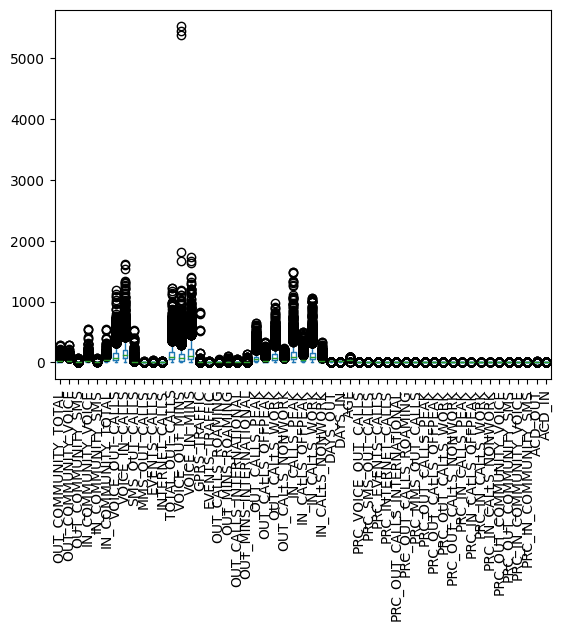

In [15]:
dat.plot.box(rot=90)

Responde las siguientes preguntas:

* <font color="blue">¿Las variables tienen la misma escala? </font>
R: Las variables no tienen la misma escala.

* <font color="blue">¿Existen datos atípicos? </font>
R: Sí, se observan algunas variables con datos atípicos.



## Estandarización.

* <font color="blue">Estandariza las variables del conjunto de datos</font>.


<AxesSubplot: >

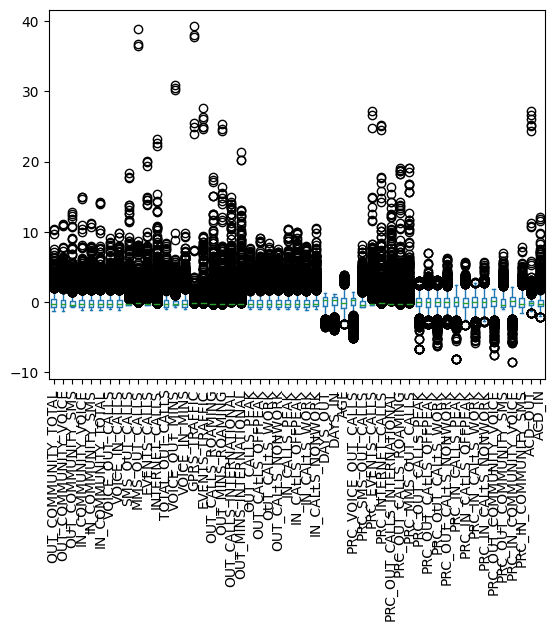

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Seg_d = scaler.fit_transform(dat)
Seg_d = pd.DataFrame(Seg_d, columns=dat.columns)
Seg_d.plot.box(rot=90)

In [17]:
Seg_d.head()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
0,-0.892844,-0.831658,-0.559631,-0.372405,-0.523576,-0.428598,-0.789834,-0.505341,-0.369767,-0.152460,...,-0.236606,0.262063,-1.165777,1.165777,0.572030,-0.362693,0.585963,-0.467481,-0.343764,-0.013667
1,1.214263,1.371271,1.831469,0.507676,1.510216,0.473618,1.897262,1.644905,8.757025,1.297798,...,0.476487,-0.479962,0.255053,-0.255053,0.705802,0.641812,0.691605,0.612641,1.710363,2.644597
2,0.217438,0.404974,-0.047926,-0.150738,-0.097317,-0.232779,0.724108,0.793501,-0.175975,-0.152460,...,0.177001,-0.168325,0.035656,-0.035656,1.083999,-0.247172,0.931942,-0.081745,0.117525,-0.612683
3,-0.824893,-0.991384,0.153607,-0.325331,0.300625,-0.285821,-0.879791,-0.538105,-0.042383,-0.152460,...,-0.526499,0.563718,0.684084,-0.684084,-3.290775,1.910985,-0.358142,0.583228,-0.900533,-1.492396
4,-0.383508,-0.520075,-0.153067,-0.005493,-0.482204,-0.058409,-0.800539,-0.671678,-0.321751,-0.152460,...,0.551163,-0.557667,-4.980476,4.980476,-1.250075,0.016767,0.698705,-0.746920,-0.174174,-1.285214


## Datos atípicos

Para evitar que los datos atípicos generen grupos de clientes poco representativos, eliminaremos cualquier observación que se encuentre a más de tres desviaciones estándar de la media.

* <font color="blue">Usando los datos estandarizados, elimina cualquier observación con un valor absoluto  mayor a tres unidades [en cualquiera de las variables]. </font>

Para la eliminación de datos atípicos aplicaré el Método de Puntuación Z
[Referencia](https://statologos.com/eliminar-valores-atipicos-en-python/)

In [18]:
# Encontramos el valor z-score de cada observación
z = np.abs(stats.zscore(Seg_d))

In [19]:
# Solo mantenemos las filas con puntuación z menor que el valor absoluto de 3
data_clean = Seg_d[(z<3).all(axis=1)]

In [20]:
# Calculamos cuantas filas quedan
data_clean.shape

(5007, 53)

Se observa que se eliminaron 1596 datos atípicos


In [21]:
#Visualizamos el encabezado de la data limpia y observamos que ya se eliminaron los registros con datos atípicos
data_clean.head()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
0,-0.892844,-0.831658,-0.559631,-0.372405,-0.523576,-0.428598,-0.789834,-0.505341,-0.369767,-0.15246,...,-0.236606,0.262063,-1.165777,1.165777,0.572030,-0.362693,0.585963,-0.467481,-0.343764,-0.013667
2,0.217438,0.404974,-0.047926,-0.150738,-0.097317,-0.232779,0.724108,0.793501,-0.175975,-0.15246,...,0.177001,-0.168325,0.035656,-0.035656,1.083999,-0.247172,0.931942,-0.081745,0.117525,-0.612683
7,0.686980,0.971051,-0.494966,0.379452,-0.227740,0.306011,0.638639,0.096400,-0.358947,-0.15246,...,0.680445,-0.692195,0.764606,-0.764606,1.298736,-0.753636,0.907353,-0.697486,-0.043796,-0.232420
10,0.180497,0.275548,-0.358832,-0.120951,0.212867,-0.091534,0.917319,0.583066,-0.184099,-0.15246,...,-0.112310,0.132725,-0.397277,0.397277,0.608274,-0.555614,-0.027914,0.114703,-0.111307,-0.498870
11,-0.297798,-0.256728,0.197981,-0.435735,0.010741,-0.453652,-0.433657,0.126940,0.051470,-0.15246,...,-1.177673,1.241312,-0.415361,0.415361,0.294353,0.480338,0.074934,0.527965,-0.020668,1.115002


<AxesSubplot: >

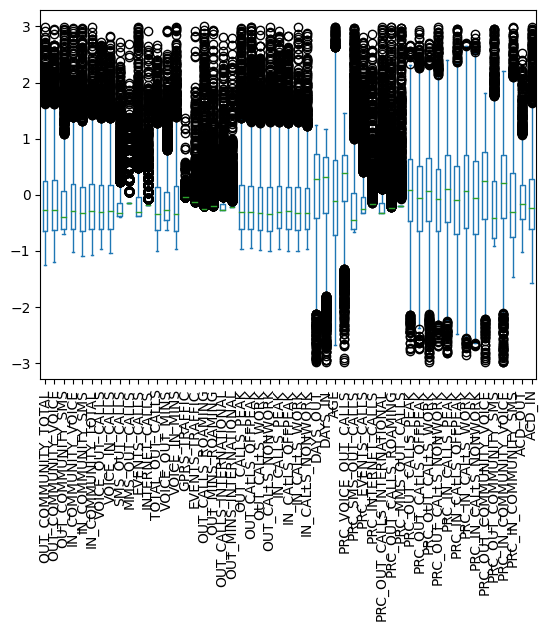

In [22]:
data_clean.plot.box(rot=90)

# **Correlación**

In [23]:
data_clean.corr()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
OUT_COMMUNITY_TOTAL,1.000000,0.981086,0.324062,0.741080,0.395100,0.753219,0.836074,0.691498,0.218553,0.072826,...,0.075791,-0.075791,0.051805,-0.051805,0.020531,-0.125299,0.306380,-0.260124,0.126024,0.037990
OUT_COMMUNITY_VOICE,0.981086,1.000000,0.235215,0.732974,0.318131,0.736857,0.853464,0.699417,0.166194,0.068333,...,0.088344,-0.088344,0.090058,-0.090058,0.187230,-0.203317,0.351284,-0.316533,0.108430,0.013708
OUT_COMMUNITY_SMS,0.324062,0.235215,1.000000,0.197136,0.795581,0.263296,0.235636,0.225828,0.765695,0.177918,...,-0.093446,0.093446,-0.110046,0.110046,-0.433670,0.779598,-0.280122,0.478282,0.156132,0.193946
IN_COMMUNITY_VOICE,0.741080,0.732974,0.197136,1.000000,0.322953,0.992015,0.559288,0.865078,0.122603,0.015170,...,0.265384,-0.265384,0.260170,-0.260170,0.043768,-0.134167,0.476901,-0.439547,0.052808,0.044193
IN_COMMUNITY_SMS,0.395100,0.318131,0.795581,0.322953,1.000000,0.411189,0.319439,0.358595,0.636229,0.188480,...,-0.131953,0.131953,-0.126107,0.126107,-0.359382,0.573491,-0.360614,0.555190,0.187302,0.161536
IN_COMMUNITY_TOTAL,0.753219,0.736857,0.263296,0.992015,0.411189,1.000000,0.567065,0.865324,0.174172,0.031892,...,0.241592,-0.241592,0.236021,-0.236021,0.002112,-0.075341,0.385839,-0.367791,0.068617,0.055529
VOICE_OUT_CALLS,0.836074,0.853464,0.235636,0.559288,0.319439,0.567065,1.000000,0.656175,0.235108,0.119378,...,0.006306,-0.006306,0.003473,-0.003473,0.172678,-0.149094,0.252780,-0.192238,0.148562,-0.002065
VOICE_IN_CALLS,0.691498,0.699417,0.225828,0.865078,0.358595,0.865324,0.656175,1.000000,0.197937,0.062016,...,0.172797,-0.172797,0.199438,-0.199438,0.111693,-0.092491,0.391939,-0.332824,0.030794,0.030705
SMS_OUT_CALLS,0.218553,0.166194,0.765695,0.122603,0.636229,0.174172,0.235108,0.197937,1.000000,0.186434,...,-0.113342,0.113342,-0.125723,0.125723,-0.254902,0.617493,-0.227873,0.415361,0.152916,0.153675
MMS_OUT_CALLS,0.072826,0.068333,0.177918,0.015170,0.188480,0.031892,0.119378,0.062016,0.186434,1.000000,...,-0.050456,0.050456,-0.061628,0.061628,-0.013788,0.131480,-0.102332,0.156193,0.072954,0.048931


# **Reduccion de dimensionalidad - PCA**

<AxesSubplot: >

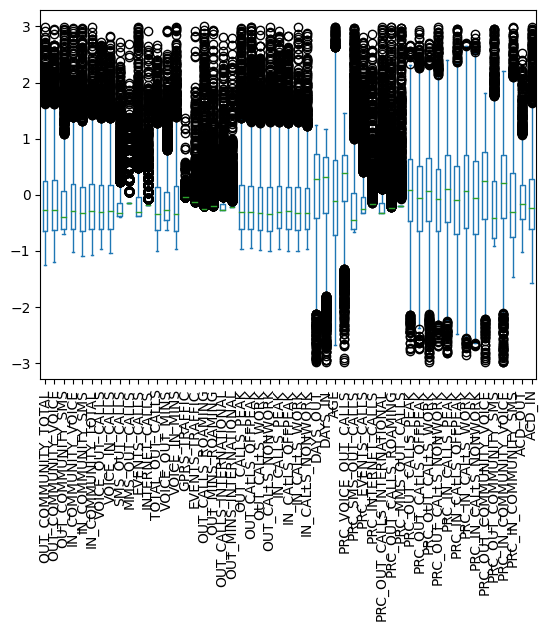

In [24]:
data_clean.plot.box(rot=90)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=53) # inicialmente, utilizamos todas las variables
pca_calif = pca.fit(data_clean)

In [26]:
pca_calif.components_

array([[ 2.23189595e-01,  2.29215747e-01,  3.60326183e-02, ...,
        -1.56049144e-01,  2.18538237e-02,  2.47467329e-02],
       [ 1.15847361e-01,  1.01158309e-01,  1.21567682e-01, ...,
         1.21740815e-01,  1.68487671e-02, -1.25466437e-02],
       [-1.90938309e-03, -4.02406168e-02,  2.85534786e-01, ...,
         3.27604543e-01,  7.05268767e-02,  1.56591094e-01],
       ...,
       [ 0.00000000e+00, -2.97605717e-16,  1.45001462e-15, ...,
         4.23815362e-17,  9.91129933e-17, -3.64270508e-16],
       [ 0.00000000e+00, -3.98218410e-18,  1.53404898e-17, ...,
        -3.82342898e-17, -2.49827887e-17, -9.63280801e-18],
       [ 0.00000000e+00,  5.90519277e-17, -1.89779866e-16, ...,
         3.84337377e-17, -6.86965996e-17,  3.98879687e-17]])

In [27]:
pca_calif.explained_variance_ratio_*100 #las componentes se ordenan de acuerdo a la variana explicad

array([2.83610373e+01, 2.30899331e+01, 1.09655566e+01, 5.68264361e+00,
       3.79856370e+00, 3.57043639e+00, 2.98766302e+00, 2.67921962e+00,
       2.30482815e+00, 2.16526092e+00, 1.59834091e+00, 1.50220386e+00,
       1.37092995e+00, 1.17679535e+00, 1.01157876e+00, 8.73421563e-01,
       8.51864418e-01, 7.27310484e-01, 6.42167749e-01, 6.31128136e-01,
       5.98820938e-01, 4.98373266e-01, 4.10265070e-01, 3.54971197e-01,
       3.39659137e-01, 2.77688285e-01, 1.85638635e-01, 1.73112251e-01,
       1.68956036e-01, 1.51142109e-01, 1.43537774e-01, 1.20761260e-01,
       1.10814263e-01, 8.21535756e-02, 6.00693356e-02, 4.82078673e-02,
       4.80288707e-02, 4.60713879e-02, 3.91089212e-02, 3.52801101e-02,
       3.26434766e-02, 2.23424878e-02, 1.82094067e-02, 1.56460873e-02,
       9.89322424e-03, 7.03259010e-03, 6.10249275e-03, 2.74771750e-03,
       1.83876765e-03, 1.84498795e-30, 7.48258077e-31, 7.06437540e-31,
       6.89212968e-31])

In [28]:
np.cumsum(pca_calif.explained_variance_ratio_)*100

array([ 28.36103725,  51.45097031,  62.41652687,  68.09917047,
        71.89773418,  75.46817056,  78.45583358,  81.1350532 ,
        83.43988135,  85.60514227,  87.20348318,  88.70568705,
        90.076617  ,  91.25341235,  92.26499111,  93.13841267,
        93.99027709,  94.71758758,  95.35975532,  95.99088346,
        96.5897044 ,  97.08807766,  97.49834273,  97.85331393,
        98.19297307,  98.47066135,  98.65629999,  98.82941224,
        98.99836827,  99.14951038,  99.29304816,  99.41380942,
        99.52462368,  99.60677726,  99.66684659,  99.71505446,
        99.76308333,  99.80915472,  99.84826364,  99.88354375,
        99.91618723,  99.93852971,  99.95673912,  99.97238521,
        99.98227843,  99.98931102,  99.99541351,  99.99816123,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

In [29]:
df_p = pca.transform(data_clean)[:,:8]
df_p[:20,:]

array([[-3.5680316 ,  1.86754708, -2.01439261,  2.78715859, -0.10706353,
         0.51278942,  0.18215468, -0.14831641],
       [ 2.31903787,  1.62657522, -0.90244197,  0.08817789, -0.05382711,
         0.59424478, -0.65105561,  0.64555495],
       [ 3.18812765, -0.90166281, -0.91365717, -0.91335761,  0.6023452 ,
         0.42010832, -0.38688245,  0.05024165],
       [ 1.96575574,  2.23286944, -0.64411275, -0.99841151,  1.03713299,
         0.24984762, -0.645049  ,  0.3500225 ],
       [-0.40946856,  0.89847935,  0.88798943, -0.1295614 , -2.06692152,
        -1.41132581,  1.16964887,  1.41620429],
       [ 1.64100793,  1.39275997, -0.88693217,  1.03614992,  1.02559857,
        -0.1807703 , -0.78753253,  0.27931374],
       [ 6.2488302 , -1.17045177,  4.31588833, -1.12769377,  0.69157859,
         1.32185736,  1.99169685,  1.00700602],
       [ 1.87472116, -0.15472316, -0.26679084, -1.15174088, -0.47405936,
         0.0468256 , -0.86812498,  0.37614381],
       [ 4.27640604,  0.86683326

In [30]:
data_clean.values[:20,:]

array([[-0.89284394, -0.83165793, -0.55963102, ..., -0.46748117,
        -0.3437638 , -0.01366745],
       [ 0.21743823,  0.40497418, -0.04792559, ..., -0.08174486,
         0.117525  , -0.61268281],
       [ 0.68698045,  0.97105085, -0.49496597, ..., -0.697486  ,
        -0.04379568, -0.23241969],
       ...,
       [-0.42176404, -0.33132775, -0.39570734, ..., -0.35952453,
        -0.16330045, -0.06402319],
       [ 1.81380364,  1.90641393,  0.7812915 , ..., -0.37543543,
         0.47825609,  0.77871616],
       [-1.01272517, -1.02917608, -0.13569588, ...,  0.84637732,
        -0.56389147,  2.80853308]])

# **Segmentación ideal**

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

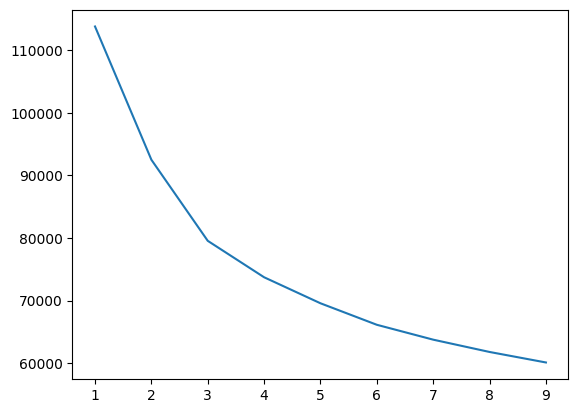

In [31]:
from sklearn.cluster import KMeans

within_var = []
k_vals = range(1,10)

for k in k_vals:
  km = KMeans(n_clusters=k, random_state=1)
  km.fit_transform(data_clean)
  within_var.append(km.inertia_)

plt.plot(np.array(k_vals), np.array(within_var))
plt.show()

# *

# **Kmeans**

In [32]:
km = KMeans(n_clusters=3, random_state=1)
km_rfm = km.fit_predict(data_clean)
km.labels_

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, ..., 0, 2, 2])

# **Grupos**

In [33]:
data_clean["gpo"] = km.labels_
data_clean.head()

C:\Users\Marco\AppData\Local\Temp\ipykernel_25580\2177031067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["gpo"] = km.labels_


,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,...,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN,gpo
0,-0.892844,-0.831658,-0.559631,-0.372405,-0.523576,-0.428598,-0.789834,-0.505341,-0.369767,-0.15246,...,0.262063,-1.165777,1.165777,0.572030,-0.362693,0.585963,-0.467481,-0.343764,-0.013667,0
2,0.217438,0.404974,-0.047926,-0.150738,-0.097317,-0.232779,0.724108,0.793501,-0.175975,-0.15246,...,-0.168325,0.035656,-0.035656,1.083999,-0.247172,0.931942,-0.081745,0.117525,-0.612683,2
7,0.686980,0.971051,-0.494966,0.379452,-0.227740,0.306011,0.638639,0.096400,-0.358947,-0.15246,...,-0.692195,0.764606,-0.764606,1.298736,-0.753636,0.907353,-0.697486,-0.043796,-0.232420,2
10,0.180497,0.275548,-0.358832,-0.120951,0.212867,-0.091534,0.917319,0.583066,-0.184099,-0.15246,...,0.132725,-0.397277,0.397277,0.608274,-0.555614,-0.027914,0.114703,-0.111307,-0.498870,2
11,-0.297798,-0.256728,0.197981,-0.435735,0.010741,-0.453652,-0.433657,0.126940,0.051470,-0.15246,...,1.241312,-0.415361,0.415361,0.294353,0.480338,0.074934,0.527965,-0.020668,1.115002,0


In [34]:
seg = data_clean.groupby("gpo").mean()
seg["tot_clientes"] = data_clean.groupby("gpo").size()
seg

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,...,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN,tot_clientes
gpo,,,,,,,,,,,,,,,,,,,,,
0,-0.417676,-0.433026,-0.089778,-0.456134,-0.090309,-0.444883,-0.400985,-0.457537,-0.117949,-0.085351,...,0.631131,-0.672515,0.672515,-0.167032,0.151805,-0.378750,0.376649,-0.088918,-0.140840,1905
1,-0.432849,-0.391746,-0.409559,-0.279495,-0.486049,-0.316769,-0.442521,-0.356977,-0.302859,-0.123345,...,-0.704677,0.733510,-0.733510,0.295344,-0.355155,0.289925,-0.401898,-0.158602,-0.092085,1801
2,0.738271,0.758033,0.045235,0.619107,0.139730,0.614678,0.673914,0.624277,-0.041597,-0.075340,...,-0.199886,0.173660,-0.173660,0.276858,-0.325257,0.509291,-0.481447,0.026882,-0.033581,1301


# **Perfilado**

### Grupo 0
- **Uso General**: Bajo en la mayoría de los servicios. **Principalmente realizan llamadas a distancia.**

- **Comunicación**: Menor uso de llamadas y mensajes, tanto entrantes como saliente.
- **Actividades en Línea y Roaming**: Bajo en uso de internet, eventos, roaming y llamadas internacionales.
- **Características Específicas**: Muy bajo en llamadas entrantes y minutos de voz entrantes.
- **Tamaño del Grupo**: El más grande con 1905 clientes.

### Grupo 1
- **Uso General**: Moderado, pero con menor actividad en comparación con el Grupo 0 en ciertas áreas. **Principalmente envían mensajes de texto.**
- **Comunicación**: Uso moderado en llamadas y mensajes, con una tendencia a menos interacción dentro de la comunidad.
- **Actividades en Línea y Roaming**: Moderado en uso de internet, eventos, roaming y llamadas internacionales.
- **Características Específicas**: Menor uso en llamadas de voz salientes y minutos de voz salientes en comparación con el Grupo 0.
- **Tamaño del Grupo**: 1801 clientes.

### Grupo 2
- **Uso General**: Alto en la mayoría de los servicios, especialmente en comunicaciones fuera y dentro de la comunidad. **Se les podría ofrecer un plan de telefonía para llamadas y mensajes. **

- **Comunicación**: Muy activo en llamadas, tanto entrantes como salientes.
- **Actividades en Línea y Roaming**: Similar al Grupo 0 y 1 en uso de internet y eventos, pero ligeramente menor en roaming y llamadas internacionales.
- **Características Específicas**: Mayor uso en llamadas de voz y minutos de voz, tanto entrantes como salientes.
- **Tamaño del Grupo**: 1301 clientes.